In [1]:
#import librari yang akan dipakai
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import cv2
import matplotlib.image as mpimg
from skimage import data

In [4]:
#membaca gambar dari file yang disimpan mengunakan cv2
image= cv2.imread('tootles.jpg', cv2.IMREAD_GRAYSCALE) 

In [5]:
#mengaplikasikan ekualisasi histogram pada gambar
image_equalized = cv2.equalizeHist(image)

In [6]:
#membuat objek CLAHE
clahe = cv2.createCLAHE(clipLimit=2, tileGridSize=(8,8)) #clipLimit menentukan batasan kontras, dan titleGridSize menentukan ukuran blok-blok yang digunakan 

#mengaplikasikan CLAHE ke gambar 
image_clahe = clahe.apply(image)

In [7]:
# membuat aray untuk output
image_cs = np.zeros((image.shape[0],image.shape[1]),dtype = 'uint8')

# mengatur Min-Max kontras gambar 
min = np.min(image)
max = np.max(image)

#fungsi untuk konversi citra menjadi citra skala abu-abu yang ditingkatkan kontrasnya
for i in range(image.shape[0]):
    for j in range(image.shape[1]):
        image_cs[i,j] = 255*(image[i,j]-min)/(max-min)

In [8]:
#membuat salinan data dengan tipe data float
copyCamera = image.copy().astype(float)

#mendapatkan ukuran gambar
m1,n1 = copyCamera.shape
output1 = np.empty([m1, n1])

#mengalikan setiap elemen citra ke 1.9
for baris in range(0, m1-1):
    for kolom in range(0, n1-1):
        a1 = baris
        b1 = kolom
        output1[a1, b1] = copyCamera[baris, kolom] * 1.9

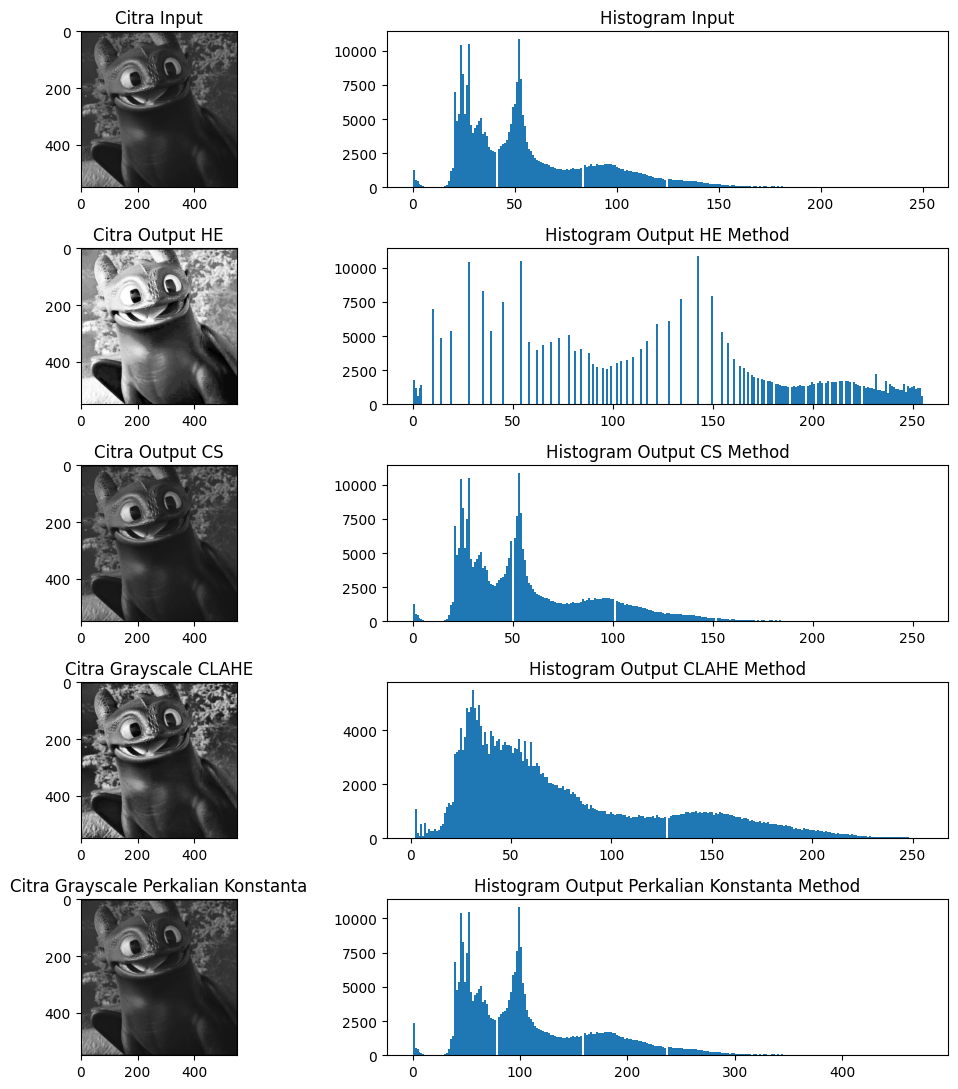

In [9]:
fig, axes = plt.subplots(5, 2, figsize=(11, 11)) #membuat tata letak subplot
ax = axes.ravel() #digunakan untuk meratakan array 

ax[0].imshow(image, cmap=plt.cm.gray) #menampilkan gambar 
ax[0].set_title("Citra Input") #menambahkan judul pada gambar
ax[1].hist(image.ravel(), bins=256) #menampilkan histogram
ax[1].set_title('Histogram Input') #menambahkan judul pada histogram

ax[2].imshow(image_equalized, cmap=plt.cm.gray)
ax[2].set_title("Citra Output HE")
ax[3].hist(image_equalized.ravel(), bins=256)
ax[3].set_title('Histogram Output HE Method')

ax[4].imshow(image_cs, cmap=plt.cm.gray)
ax[4].set_title("Citra Output CS")
ax[5].hist(image_cs.ravel(), bins=256)
ax[5].set_title('Histogram Output CS Method')

ax[6].imshow(image_clahe, cmap=plt.cm.gray)
ax[6].set_title("Citra Grayscale CLAHE")
ax[7].hist(image_clahe.ravel(), bins=256)
ax[7].set_title('Histogram Output CLAHE Method')

ax[8].imshow(output1, cmap=plt.cm.gray)
ax[8].set_title("Citra Grayscale Perkalian Konstanta")
ax[9].hist(output1.ravel(), bins=256)
ax[9].set_title('Histogram Output Perkalian Konstanta Method')

fig.tight_layout()